1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from scipy import stats
plt.style.use("ggplot")

#import all library for data visualization

import sklearn

#import all dependencies and library for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
headers = pd.read_csv('header.csv', header=None)
df = pd.read_csv('used_car.csv', header=None)

headings =headers[0].values.tolist()
df.columns = headings

#df.head()

### Basic insights from the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

we have four data types. we have some object column which are supposed to be numerical but they ahre object because they contains ? namely, price,peak rpm,normalized-losses, wheel-base,engine-size,bore,peak-rpm,horsepower,stroke

In [4]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


## Data Cleaning

In [5]:
# we replace ? with empty value
df1 = df.replace('?', np.NaN)

In [6]:
#Identifying missing data

for col in df1.columns:
    no_missing = df1[col].isnull().sum()
    if no_missing > 0:
        print(f"{col} - {no_missing} - {df1[col].dtypes}")



normalized-losses - 41 - object
num-of-doors - 2 - object
bore - 4 - object
stroke - 4 - object
horsepower - 2 - object
peak-rpm - 2 - object
price - 4 - object


we have 41 missing data in the normalized-losses column and 2 missing column. 2 in num-of-door. and 4 in bore, stroke and price

In [7]:
# we drop the missing value in along the price column
df = df1.dropna(subset=['price'], axis=0).copy()
df['price'] = df['price'].astype('float')
#df.head(5)

we replace number of doors with the mode. Drop the Nan in the price column. We want to predict price. any column without price can not be used for prediction. 

we input mean into other missing variables

In [8]:
# convert the some object format to categories
to_cat = ["price","peak-rpm","normalized-losses", "wheel-base","engine-size","bore","horsepower","stroke"]

miss_col = ["peak-rpm","normalized-losses","bore","horsepower","stroke", 'city-mpg']

for col in to_cat:
    avg = df[col].astype('float').mean(axis=0)
    df[col].replace(np.nan, avg, inplace=True)

#df1.info()

#for numbers of doors
df['num-of-doors'].replace(np.nan, 'four', inplace=True)
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [9]:
#To Do... creaete another df with dummy variables and drop the necessary column
for col in miss_col:
    df[col] = df[col].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [10]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

##### Data Standardization

In [11]:
df['c-L/100km'] = round(235/df['city-mpg'] , 2)
df['h-L/100km'] = round(235/df['highway-mpg'], 2 )

df = df.drop(['city-mpg', 'highway-mpg'], axis=1)

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,c-L/100km,h-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.19,8.70
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.19,8.70
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.37,9.04
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.79,7.83
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.06,10.68


###### checking for outliers

In [12]:
# i seperate the categories into different column

dtypes = ['float64', 'object', 'int64']

df_dtypes = []
for col in dtypes:
    col_list = list(df.select_dtypes(include=[col]).columns)
    df_dtypes.append(col_list)
    #print(f"the list of  {col} columns is ;\n", col_list )
    
num_col = df_dtypes[0] + df_dtypes[2]    
#num_col

In [13]:
def box_plot(data, num_cols):
    '''make boxplot of multiple number of column'''
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(data[l], palette='flare')

Text(0.5, 1.0, 'Outliers Price Distribution')

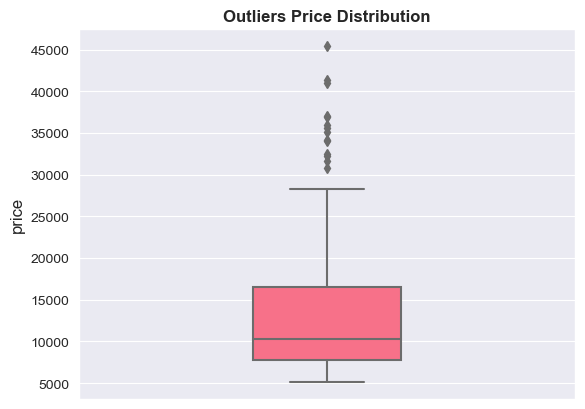

In [14]:
sns.set_style("darkgrid")
sns.boxplot(data=df,y='price', palette="husl" ,whis=1.5,saturation=1, width=0.3)
plt.title("Outliers Price Distribution", fontsize = 12, fontweight = 'bold')


The outliers are due to exotic cars with special attributes so we will not discard them

## Exploratory data analysis

We aim to understand nature of the data after cleaning. we answer questions like
> How many different data type do we have?
Which of the variables are relevant to our analysis?
Do I need to convert some continous variable to a categorical variable?

In [15]:
def pie_plot(data, col_list):
    '''takes in dataframe and column list.. then plot pie chart '''
    fig, axes = plt.subplots(3,3)
    for ax, col in zip(axes.ravel(), col_list):
        count = data[col].value_counts()
        count.plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=12, autopct='%1.0f%%')
        plt.title(label=col, )
        

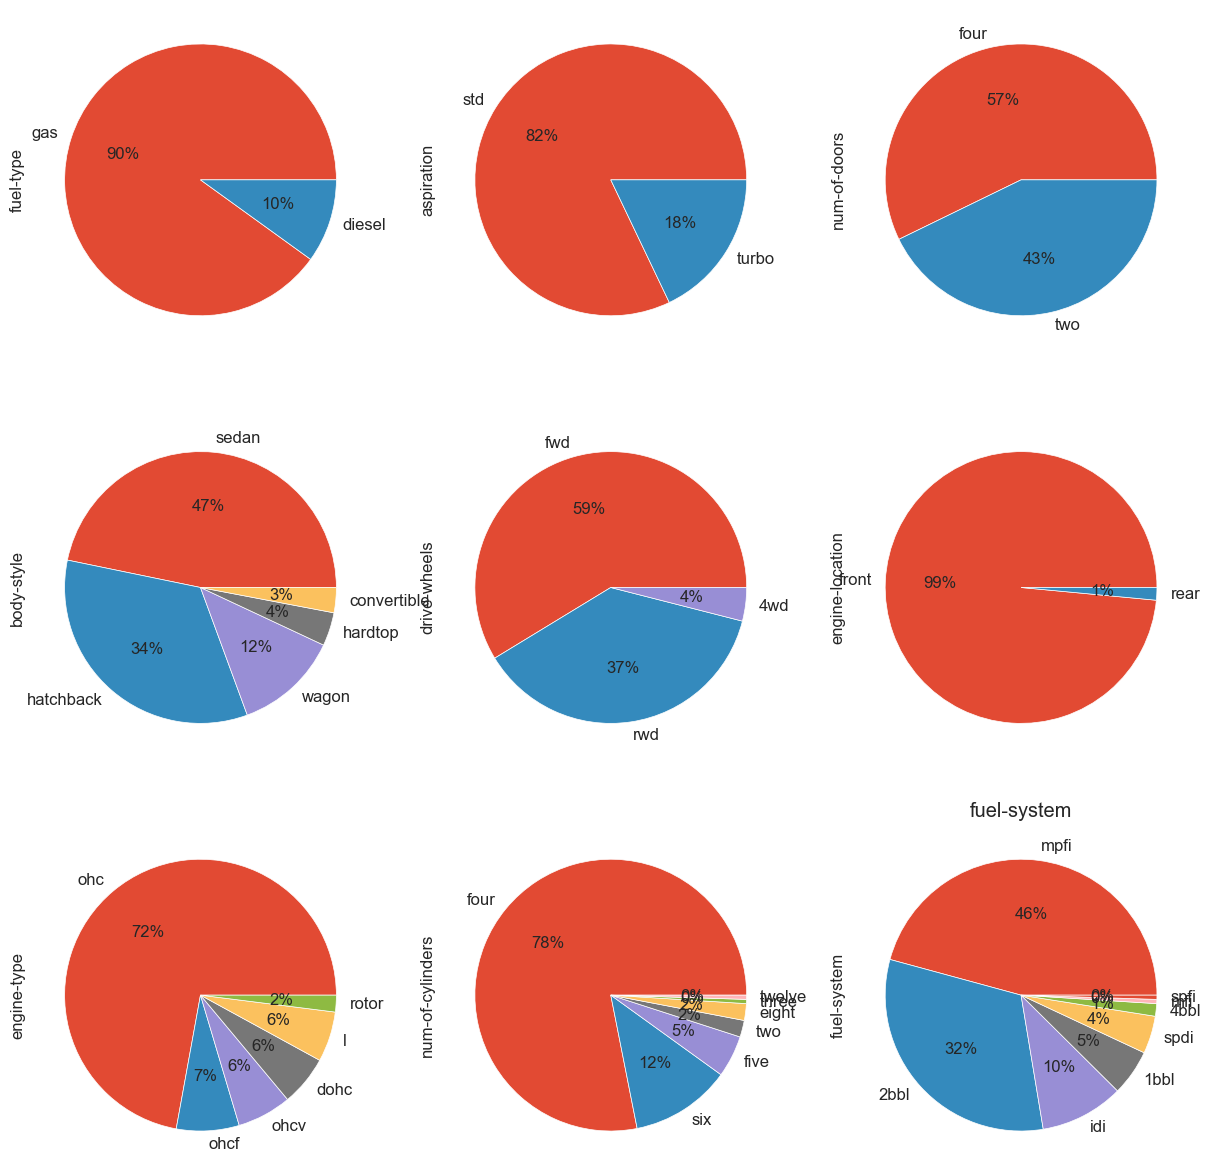

In [16]:
obj_col = df_dtypes[1].copy()
obj_col.pop(0)

pie_plot(df, obj_col)

Text(0, 0.5, 'Count of Cars')

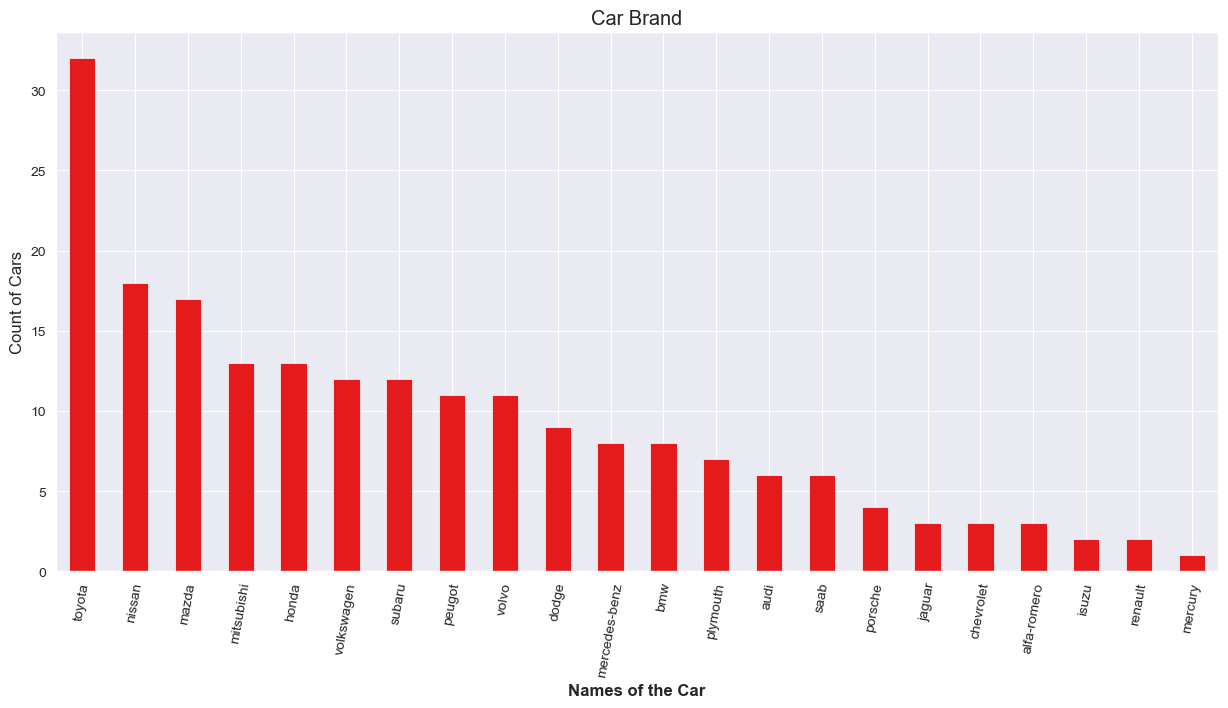

In [17]:
plt.figure(figsize = [15, 7])
ax=df['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
plt.xticks(rotation=80)
ax.title.set_text('Car Brand')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars")



<AxesSubplot:xlabel='price', ylabel='Density'>

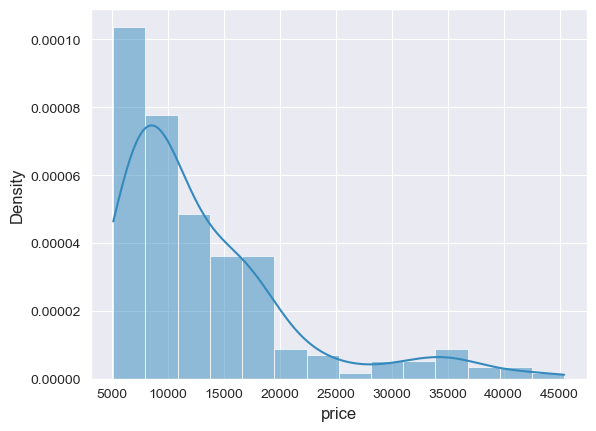

In [18]:
sns.histplot(df['price'], kde=True, stat='density')

Most vehicle prices ranges from 5000 to 20000 bucks

####  Price by Categorical variables 

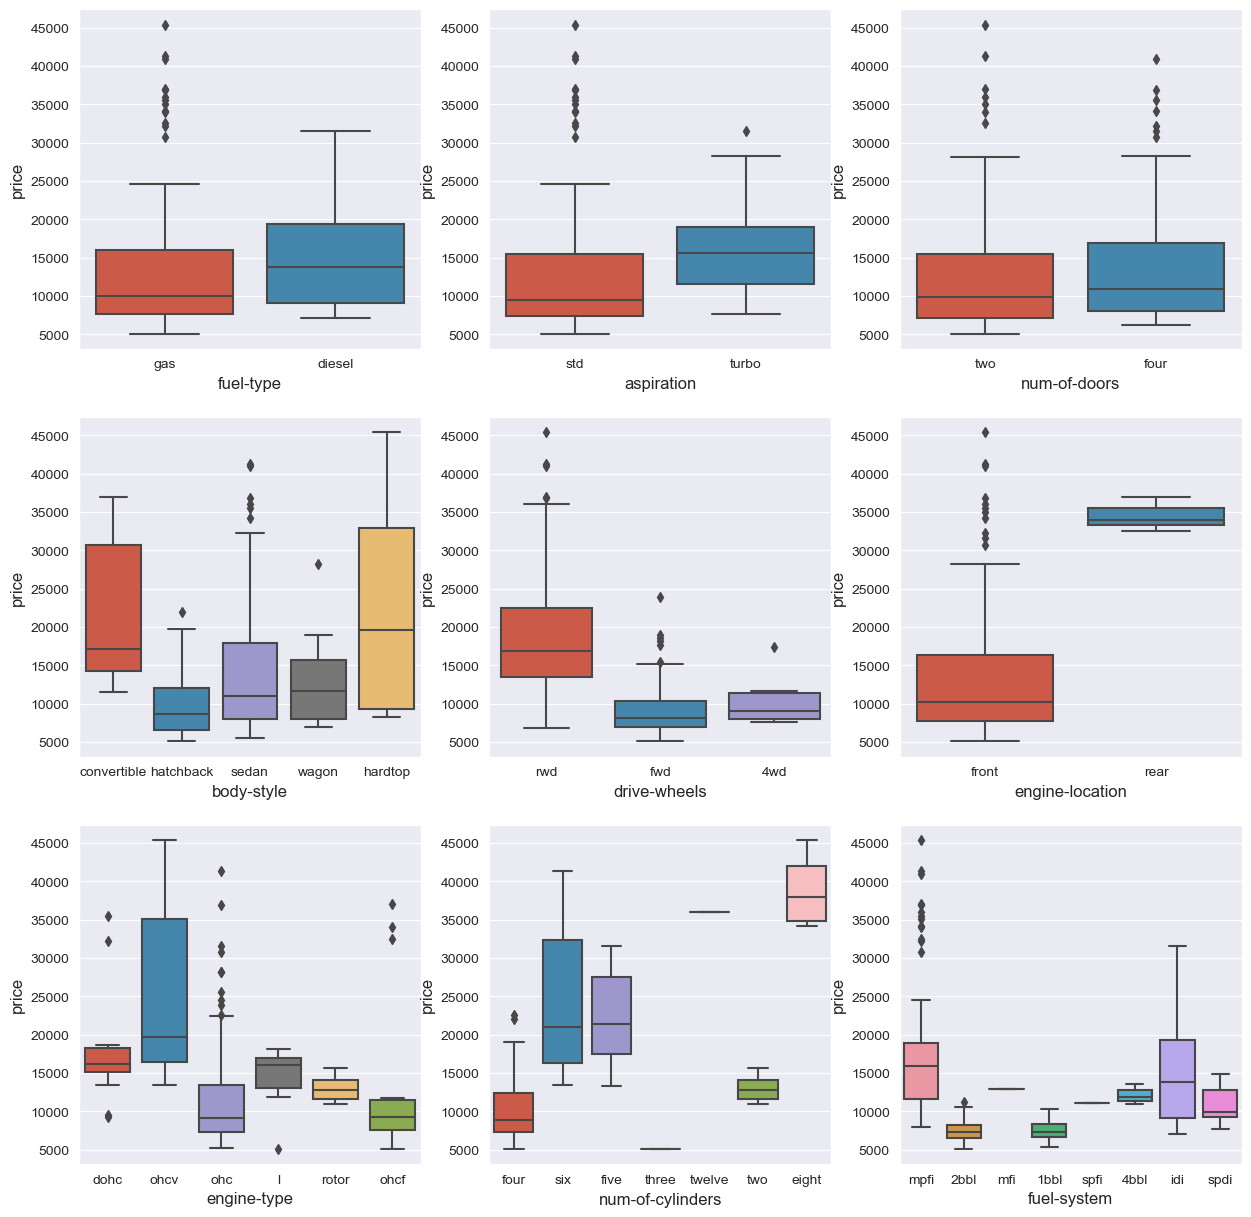

In [19]:
columns = obj_col.copy()
axs = [331, 332, 333, 334, 335, 336, 337, 338, 339]
col_index = [0, 1, 2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize = (10, 7))

for num in col_index:
    plt.subplot(axs[num])
    sns.boxplot(x=columns[num], y='price', data=df)
    fig = plt.gcf()
    fig.set_size_inches(15, 15)


>. Diesel fuel are comparatively more eypensive than gas fuelle
>. Rear engine location are way more expensive than front. Cars with 8 engines are way more expensive.

#### Average price by Brand


<AxesSubplot:xlabel='price', ylabel='make'>

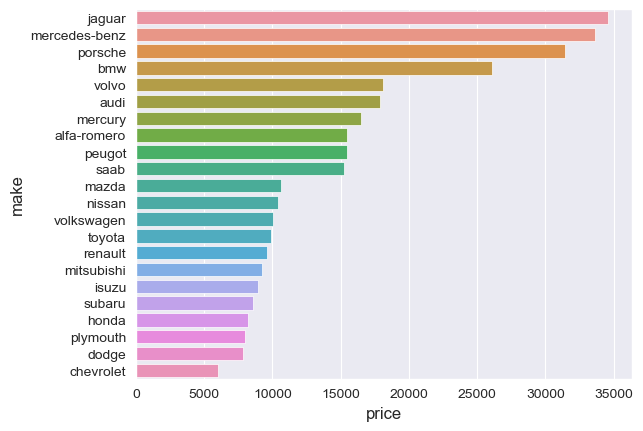

In [20]:
df_avg = df.groupby('make')['price'].mean().reset_index()
df_avg = df_avg.sort_values(by='price', ascending=False)
sns.barplot(y="make", x="price", data=df_avg)

On average, Jaaguar and Benz cars are the most expensive while Chevrolet and dodge are very cheap

### Data normalization

In [21]:
dimension = ['height', 'length', 'width']

for col in dimension:
    df[col] = df[col]/df[col].max()

#### Binning

In [22]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)
# divide the horsepower into 3 categories
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [23]:
bins_price = [0, 10000, 20000, 40000]
#bins_price = np.linspace(min(df['price']), max(df['price']), 4)
label = ['budget_friendly', 'Medium', 'upscale']
df['categories'] = pd.cut(df['price'], bins_price, labels=label, include_lowest=True)
#df[['price', 'categories']].head()

In [24]:
#corelation matrix for te categorical var
num_col.append('price')


In [33]:
dff = df.copy()

<AxesSubplot:>

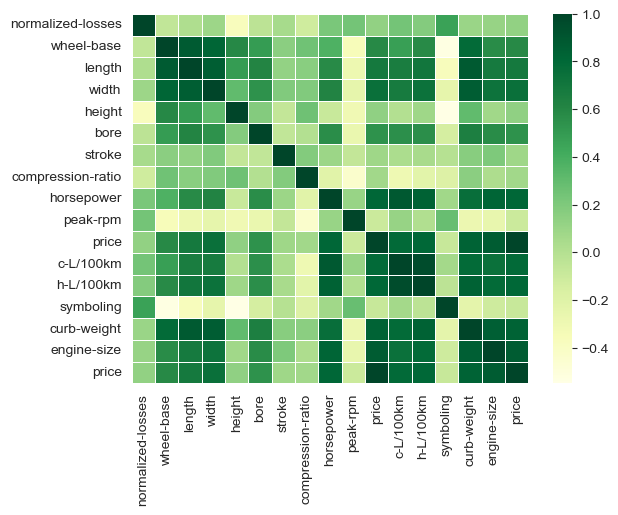

In [34]:
sns.heatmap(df[num_col].corr(),  fmt='.1f', cmap='YlGn', linewidth=.5)

## Data Preparation

#### Dummy variable
We have to convert the categorical variable into numeric.

In [35]:
obj_col.extend(['horsepower-binned', 'categories','make'])

In [36]:
dummies = pd.get_dummies(df[obj_col])
dummies.shape

(201, 65)

In [37]:
#drop extra colum cretated during dummy variable created
dummies = pd.get_dummies(df[obj_col], drop_first=True)
dummies.shape

(201, 53)

In [38]:
#adding dummies to original dataframe
df = pd.concat([df, dummies], axis=1)

In [39]:
#drop original cat_col as dummy has been created
df.drop(obj_col, axis=1, inplace=True)
df.shape

(201, 69)

In [40]:
# We specify that train and test data always have the same row
# we divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
df_train.head()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
166,1,168.0,94.5,0.810668,0.888889,0.879599,2300,98,3.24,3.08,...,0,0,0,0,0,0,0,1,0,0
78,2,161.0,93.7,0.755887,0.894444,0.849498,2004,92,2.97,3.23,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
190,3,256.0,94.5,0.796252,0.888889,0.859532,2221,109,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0
144,0,102.0,97.0,0.826526,0.908333,0.908027,2385,108,3.62,2.64,...,0,0,0,0,0,0,1,0,0,0


#### Rescaling the features
Scaling is very important for linear regression or else our model might be biased towards features with higher range. Some of the coefficient obtain by fitting the regression model might be very large or very small as compare to the other coefficients. We use two ways of standard scaling.

In [43]:
scaler = preprocessing.StandardScaler()

In [44]:
import warnings
warnings.filterwarnings("ignore")

df_train[num_col] = scaler.fit_transform(df_train[num_col])


In [45]:
df_train.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
166,0.155703,1.467673,-0.726874,-0.463942,-0.862132,-0.586545,-0.496610,-0.679759,-0.328595,-0.487898,...,0,0,0,0,0,0,0,1,0,0
78,0.994101,1.243146,-0.853839,-1.359288,-0.675725,-1.343377,-1.064228,-0.827037,-1.298817,-0.028045,...,0,0,0,0,0,0,0,0,0,0
3,0.994101,1.339372,0.114268,0.156517,0.163106,0.128241,-0.425658,-0.409749,-0.508266,0.493123,...,0,0,0,0,0,0,0,0,0,0
190,1.832500,4.290298,-0.726874,-0.699559,-0.862132,-1.091100,-0.648103,-0.409749,-0.508266,0.493123,...,0,0,0,0,0,0,0,0,1,0
144,-0.682696,-0.649295,-0.330109,-0.204763,-0.209708,0.128241,-0.333612,-0.434295,1.036902,-1.836802,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

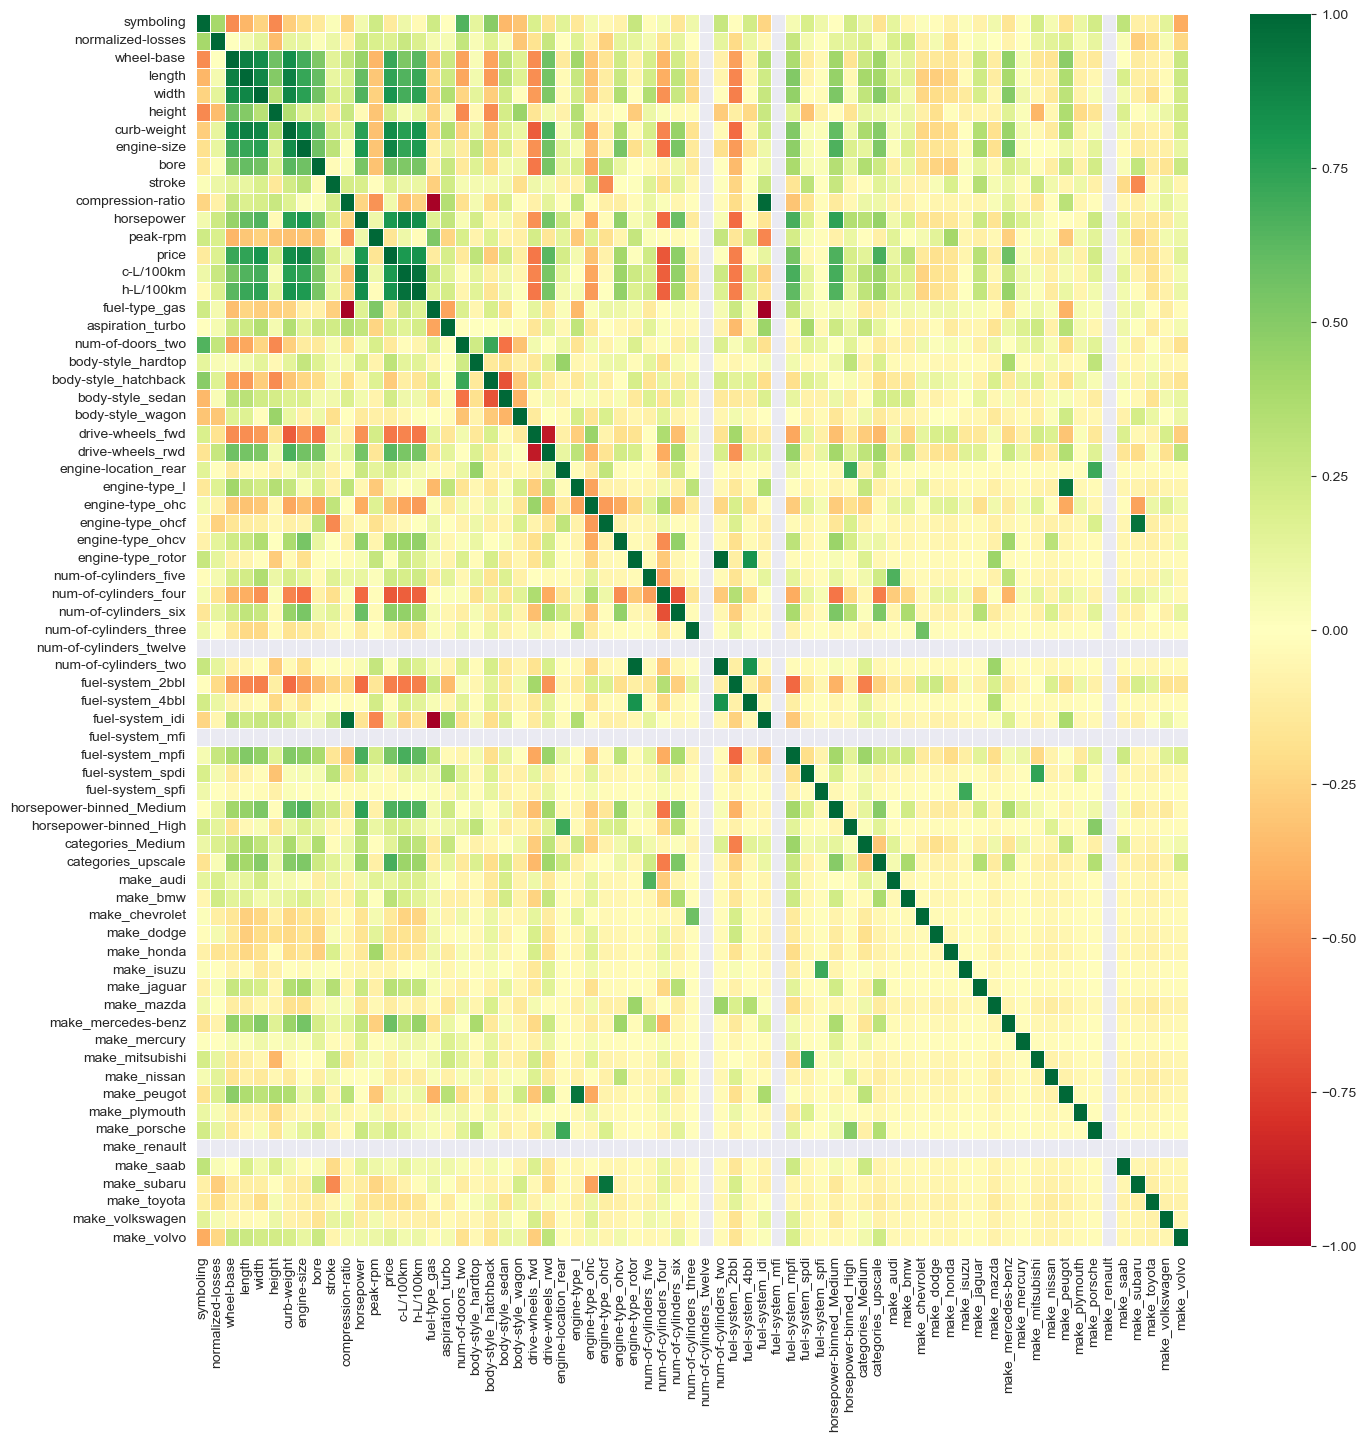

In [46]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_train.corr(),   cmap='RdYlGn', linewidth=.5)

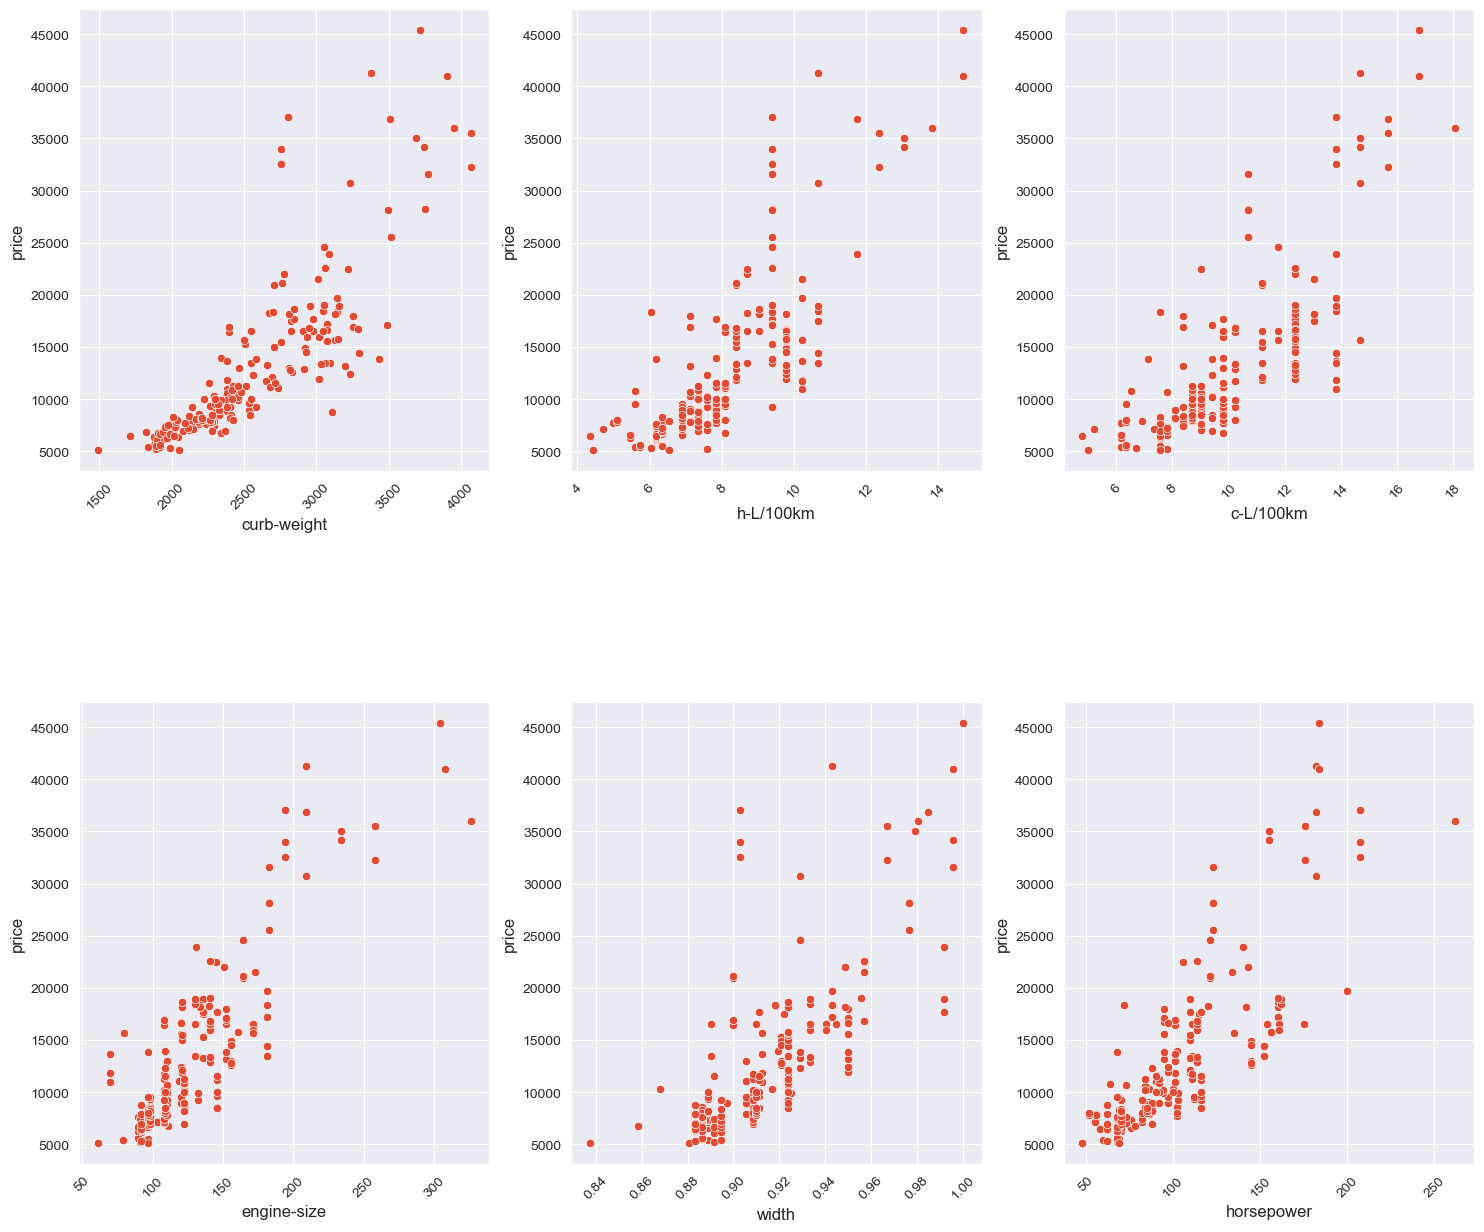

In [47]:
#few correlated variable vs price
cor_col = ['curb-weight', 'h-L/100km', 'c-L/100km','engine-size', "width",'horsepower']

fig, axes = plt.subplots(2, 3, figsize=(18, 15))
for seg, col in enumerate(cor_col):
    x, y =seg//3,seg%3
    an=sns.scatterplot(x=col, y='price', data=df, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
    
plt.subplots_adjust(hspace=0.5 )

In [48]:
# Dividing into X ynd Y set for the model building
y_train = df_train.pop('price')
X_train = df_train

### Building a linear model

In [49]:
X_train_1 = X_train['horsepower']

In [50]:
#add a constant
X_train_1c = sm.add_constant(X_train_1)

# create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [51]:
lr_1.params

const         5.551115e-17
horsepower    7.940908e-01
dtype: float64

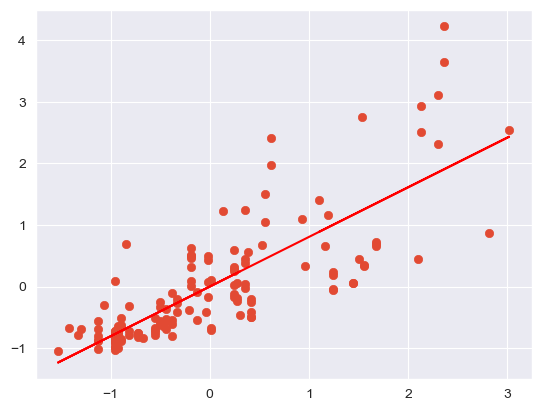

In [52]:
#Let's visualise the data with a scatterpplot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [53]:
# print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     235.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.23e-31
Time:                        15:08:24   Log-Likelihood:                -128.94
No. Observations:                 140   AIC:                             261.9
Df Residuals:                     138   BIC:                             267.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.551e-17      0.052   1.07e-15      1.0

The R-squared value obtained is 0.63. we can do better than this. lets add the other highly correlated variable.

In [54]:
X_train_2 = X_train[['horsepower', 'curb-weight']]

In [55]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [56]:
lr_2.params

const          5.551115e-17
horsepower     3.637766e-01
curb-weight    5.710591e-01
dtype: float64

In [57]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     231.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.21e-44
Time:                        15:08:24   Log-Likelihood:                -95.310
No. Observations:                 140   AIC:                             196.6
Df Residuals:                     137   BIC:                             205.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.551e-17      0.041   1.36e-15      

The r-square increase from 0.63 to 0.768


##### Adding another variable

In [58]:
X_train_3 = X_train[['horsepower', 'curb-weight', 'width']]

In [59]:
X_train_3c = sm.add_constant(X_train_3)

In [60]:
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [61]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     177.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           7.60e-47
Time:                        15:08:24   Log-Likelihood:                -87.148
No. Observations:                 140   AIC:                             182.3
Df Residuals:                     136   BIC:                             194.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.551e-17      0.039   1.44e-15      

We have achieved a 79 precent accuracy by manually fitting the highly correlated variables. Lets use RFE to select the independent variables

#### RFE

We use the recursive feature elimination since we have too many independent variable

In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15,step=1)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_, rfe.ranking_))      

[('symboling', False, 49),
 ('normalized-losses', False, 50),
 ('wheel-base', False, 22),
 ('length', False, 23),
 ('width', False, 35),
 ('height', False, 40),
 ('curb-weight', True, 1),
 ('engine-size', False, 10),
 ('bore', False, 39),
 ('stroke', False, 28),
 ('compression-ratio', False, 27),
 ('horsepower', False, 48),
 ('peak-rpm', False, 25),
 ('c-L/100km', True, 1),
 ('h-L/100km', False, 21),
 ('fuel-type_gas', True, 1),
 ('aspiration_turbo', False, 12),
 ('num-of-doors_two', False, 37),
 ('body-style_hardtop', False, 3),
 ('body-style_hatchback', False, 43),
 ('body-style_sedan', False, 51),
 ('body-style_wagon', False, 46),
 ('drive-wheels_fwd', False, 41),
 ('drive-wheels_rwd', False, 6),
 ('engine-location_rear', True, 1),
 ('engine-type_l', True, 1),
 ('engine-type_ohc', False, 31),
 ('engine-type_ohcf', False, 32),
 ('engine-type_ohcv', False, 4),
 ('engine-type_rotor', True, 1),
 ('num-of-cylinders_five', True, 1),
 ('num-of-cylinders_four', True, 1),
 ('num-of-cylinders

In [63]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curb-weight', 'c-L/100km', 'fuel-type_gas', 'engine-location_rear',
       'engine-type_l', 'engine-type_rotor', 'num-of-cylinders_five',
       'num-of-cylinders_four', 'num-of-cylinders_six', 'num-of-cylinders_two',
       'fuel-system_spdi', 'categories_upscale', 'make_bmw', 'make_isuzu',
       'make_peugot'],
      dtype='object')

In [64]:
#creating X_train dataframe with RFE selected variable
X_train_rfe = X_train[col_sup]

After passing the arbitrary selected columns by RFE. We will manually evaluate each models P-value and VIF value. Unless we find the acceptable range of p-values and VIF. we  drop the variables one ata a time based on below criteria:
    
    .High p-value/High VIF: drop the variable
    .High p-value/Low VIF or Low p-value/high VIF: Drop high p-value var first
    .Low p-value/Low VIF: Accept the variable

In [65]:
# Adding a constant variable and build a first fitted model
import statsmodels.api as sm
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

# summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     146.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.51e-70
Time:                        15:08:24   Log-Likelihood:                 1.2329
No. Observations:                 140   AIC:                             27.53
Df Residuals:                     125   BIC:                             71.66
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.05

####  Checking VIF
Variance Inflation factor or VIF, gives a basic qantitative idea about how much the feature variable are correlated with each other

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,engine-type_rotor,inf
9,num-of-cylinders_two,inf
2,fuel-type_gas,21.97
7,num-of-cylinders_four,21.25
14,make_peugot,16.38
4,engine-type_l,13.83
1,c-L/100km,9.73
0,curb-weight,7.27
8,num-of-cylinders_six,3.51
11,categories_upscale,2.37


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

##### Dropping the variables and updating the model

drop the make_peugot because its p-value is 0.1. we want p <= 0.05

In [67]:
#dropping the insignificant variable
X_train_rfe1 = X_train_rfe.drop('make_peugot', axis=1)

# Adding a constant and build a second fitted model
X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     155.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           7.04e-71
Time:                        15:08:25   Log-Likelihood:               -0.20293
No. Observations:                 140   AIC:                             28.41
Df Residuals:                     126   BIC:                             69.59
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.91

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,engine-type_rotor,inf
9,num-of-cylinders_two,inf
2,fuel-type_gas,16.76
7,num-of-cylinders_four,15.08
1,c-L/100km,8.58
0,curb-weight,7.27
8,num-of-cylinders_six,3.28
11,categories_upscale,2.31
6,num-of-cylinders_five,1.52
4,engine-type_l,1.50


In [69]:
# dropping engine rotor and retraining the model
X_train_rfe2 = X_train_rfe1.drop('engine-type_rotor', axis=1)

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe_df2 = sm.OLS(y_train, X_train_rfe2c).fit()

#summary of linear model
print(lm_rfe_df2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     155.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           7.04e-71
Time:                        15:08:25   Log-Likelihood:               -0.20293
No. Observations:                 140   AIC:                             28.41
Df Residuals:                     126   BIC:                             69.59
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.91

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


                 Features    VIF
2           fuel-type_gas  16.76
6   num-of-cylinders_four  15.08
1               c-L/100km   8.58
0             curb-weight   7.27
7    num-of-cylinders_six   3.28
10     categories_upscale   2.31
5   num-of-cylinders_five   1.52
4           engine-type_l   1.50
11               make_bmw   1.42
8    num-of-cylinders_two   1.31
3    engine-location_rear   1.25
9        fuel-system_spdi   1.21
12             make_isuzu   1.03


The VIF and p-value are within acceptable range. we can go ahead and make our prediction using model lm_rfe_df

In [71]:
#dropping make_izuzu because the p value > .05.. and retrain the model
X_train_rfe3 = X_train_rfe2.drop('engine-location_rear', axis=1)

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#summary of linear model
print(lm_rfe3.summary())
    


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     141.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.52e-67
Time:                        15:08:25   Log-Likelihood:                -12.142
No. Observations:                 140   AIC:                             50.28
Df Residuals:                     127   BIC:                             88.52
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.96

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


                 Features    VIF
2           fuel-type_gas  16.25
5   num-of-cylinders_four  14.73
1               c-L/100km   8.00
0             curb-weight   6.56
6    num-of-cylinders_six   3.12
9      categories_upscale   2.13
4   num-of-cylinders_five   1.52
3           engine-type_l   1.47
10               make_bmw   1.35
7    num-of-cylinders_two   1.30
8        fuel-system_spdi   1.21
11             make_isuzu   1.03


In [73]:
#dropping make_izuzu because the p value > .05.. and retrain the model
X_train_rfe4 = X_train_rfe3.drop('make_isuzu', axis=1)

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#summary of linear model
print(lm_rfe4.summary())
    



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     150.9
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.15e-67
Time:                        15:08:26   Log-Likelihood:                -14.078
No. Observations:                 140   AIC:                             52.16
Df Residuals:                     128   BIC:                             87.45
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.97

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


                 Features    VIF
2           fuel-type_gas  16.24
5   num-of-cylinders_four  14.72
1               c-L/100km   8.00
0             curb-weight   6.55
6    num-of-cylinders_six   3.11
9      categories_upscale   2.13
4   num-of-cylinders_five   1.52
3           engine-type_l   1.47
10               make_bmw   1.35
7    num-of-cylinders_two   1.30
8        fuel-system_spdi   1.21


In [75]:
X_train_rfe5= X_train_rfe4.drop('fuel-type_gas', axis=1)

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#summary of linear model
print(lm_rfe5.summary())
    

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.42e-62
Time:                        15:08:27   Log-Likelihood:                -29.693
No. Observations:                 140   AIC:                             81.39
Df Residuals:                     129   BIC:                             113.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.31

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                Features   VIF
0            curb-weight  4.03
1              c-L/100km  3.86
8     categories_upscale  2.13
5   num-of-cylinders_six  1.83
4  num-of-cylinders_four  1.51
2          engine-type_l  1.47
9               make_bmw  1.34
6   num-of-cylinders_two  1.29
3  num-of-cylinders_five  1.20
7       fuel-system_spdi  1.18


In [77]:
#predicting the price of training set.
y_train_price = lm_rfe5.predict(X_train_rfe5c)

Text(0.5, 0, 'Errors')

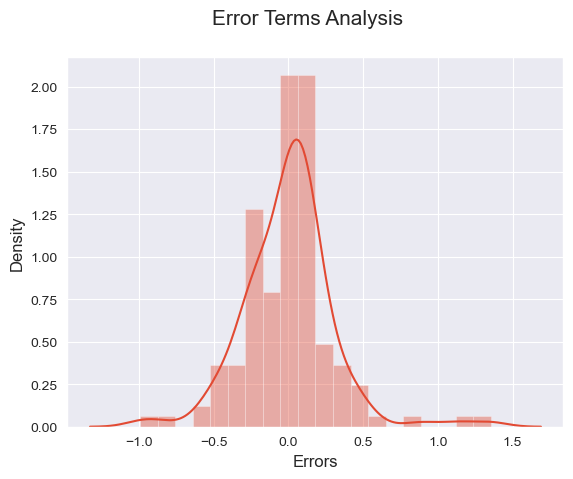

In [78]:
# plot the histogram of the error term

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 15)                   
plt.xlabel('Errors', fontsize = 12)

###  Making predictin using the final model

In [79]:
import warnings
warnings.filterwarnings('ignore')

df_test[num_col] = scaler.transform(df_test[num_col])
df_test.shape

(61, 69)

In [80]:
# dividing the test df into x_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [81]:
X_test_1 = sm.add_constant(X_test)
X_test_new = X_test_1[X_train_rfe5c.columns]

In [82]:
y_pred = lm_rfe5.predict(X_test_new)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

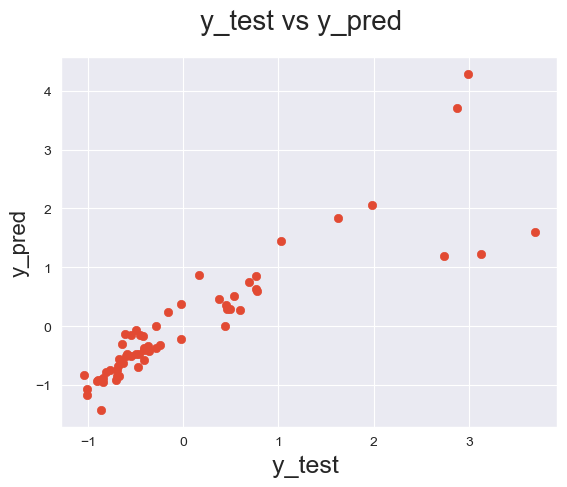

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16) 

In [84]:
r2_score(y_test, y_pred)

0.7922040042616415

## Building another model without scaling price

#### Feature selection
Feature selection method are intended to reduce the number of iput variable to those that are most useful for the model

In [89]:
X = df.drop('price', axis=1)
y = df['price']

### Recursive feature elimination (RFE) with random forest

In [92]:
clf = RandomForestRegressor()
rfe = RFE(clf, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best feature by rfe: ', X.columns[rfe.support_])

Chosen best feature by rfe:  Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'c-L/100km', 'h-L/100km', 'categories_Medium',
       'categories_upscale'],
      dtype='object')


In [93]:
features = list(X.columns[rfe.support_])

## Data Modelling and Evaluation

In [95]:
x = X[features]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [101]:
lreg = linear_model.LinearRegression()
LMR = lreg.fit(x_train, y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test, y_test)

0.8838158802650877

Text(0.5, 0, 'Errors')

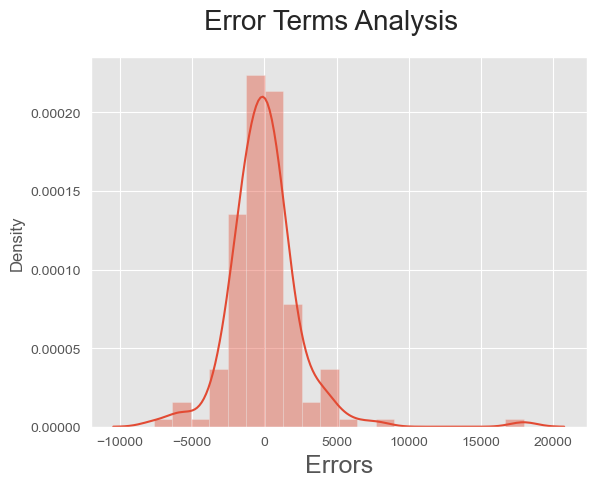

In [103]:
# plot the histogram of the error 
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Decision Tree Regressor 

In [108]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test, y_test)

0.9390451510522781

## Random Forest Regressor 

In [110]:
Rf = RandomForestRegressor(n_estimators=15, criterion='mse', random_state = 20, n_jobs=-1)
Rf.fit(x_train, y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)

r2_score(y_test, Rf_test_pred)

0.939048907444853